In [1]:
from __future__ import print_function, division     # Python 2/3 compatibility
from skimage import io                              # utilities to read and write images in various formats
import numpy as np                                  # array manipulation package
import matplotlib.pyplot as plt                      # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)            # set default figure size
plt.rcParams['image.cmap'] = 'gray'                 # set default colormap to gray

# Assignment 5 : Image Compression

The following programming assignment involves the tasks related to image compression. We will be studying a lossy image compression technique based on discrete cosine transform (DCT) and a discrete fourier transform (DFT).

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember to **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** 
Student: Name - Nirzor Talukder; 
Student Id - 2207845

* **Contact information:** 
email Address - 1: nirzor.talukder@student.oulu.fi

# The CODEC in image compression pipelines
The pipeline for image compression has an encoder and a decoder. The encoder, typically has three blocks, viz., 1) Mapper, 2) Quantizer 3) Symbol coder. For more details, refer to the lecture notes or the Chapter 8 of the textbook. In brief,  <br />
    1) The mapper takes in your input image and transforms it into another form which is most easy to process. It removes *pixel or temporal redundancy* at this stage. This stage is reversible.<br />
    2) The quantizer typically reduces the *resolution* of the output of the mapper by removing the irrelevant information. A quantizer is an irreversible step, and leads to loss of information. **The tasks here revolve around this block primarily.** <br />
    3) The third stage is a symbol coder, which maps each output of the quantizer with a fixed-length or run-length code. *Typically, the shortest codes are mapped to the symbols which have highest probability of occurring, à la Huffman encoding.*

# 1. DCT-based block transform coding
The goal of this task, is to study the lossy compression techniques, specifically the DCT-based block transform coding. For this, we will be using the one-dimensional DCT available in scipy, [`dct`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html) and its inverse DCT available in scipy, [`idct`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idct.html)

The goals of this task is to perform image compression using Discrete Cosine Transform. There are three main steps here. First is to compute a block DCT. Second step is to remove 20% of the smallest coefficients. Third step is to compute the block inverse DCT and reconstruct the image. 

**1.1 First read the test.jpg image and ensure that its datatype is float.**

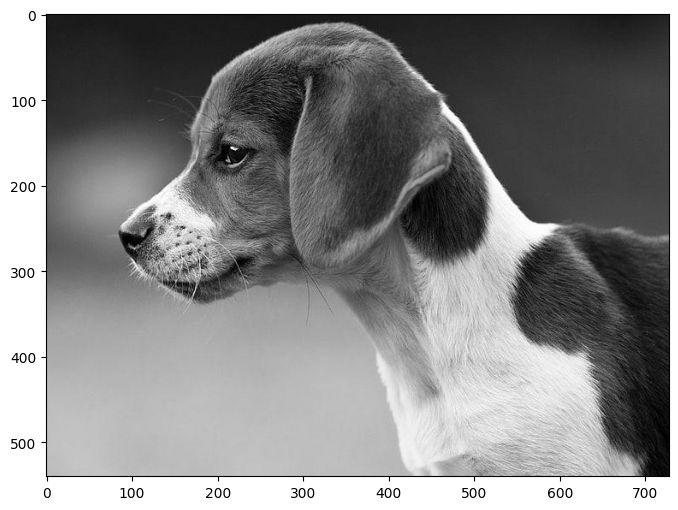

In [2]:
from scipy.fft import  idct, dct
# First read the grayscale test.jpg image. Make sure to convert the datatype to float
from skimage import io

# reading the image
test = io.imread('test.jpg')

# datatype to float
test = test.astype(float)

# Plot the given image as a grayscale
import matplotlib.pyplot as plt
plt.imshow(test, cmap='gray')
plt.show()


**We will use the functions in scipy.fft package for computing DCT and inverse DCT transforms. However, they perform one-dimensional DCT and inverse DCT. Therefore, following is a wrapper to perform two-dimensional DCT and inverse DCT.**

In [3]:
# Two functions are implemented for computing 2D DCT and 2D inverse DCT.
def dct2(a):
    return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho') 

**1.2 Next, use the given function for two-dimensional DCT to perform block DCT on the input image test.jpg. For this you need to block partition your image in blocks of size 8 x 8. </br> Compute the DCT for each 8 x 8 block and store it in a new numpy array. E.g., if your image has 32x32 pixels, then it will have 4 block rows and 4 block columns, each block being of 8x8 size.**

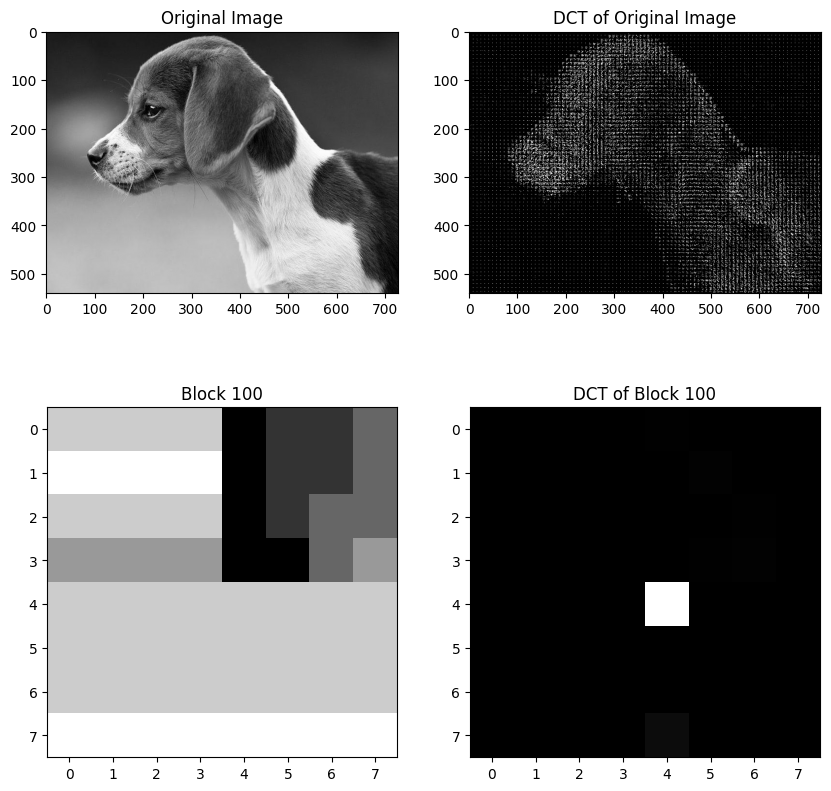

In [4]:
from numpy import r_

w = 8

test_shape = test.shape
test_dct = np.zeros(test_shape)

# Now go through each of the 8x8 blocks of the original image and compute its dct.
for i in r_[:test_shape[0]:8]:
  for j in r_[:test_shape[1]:8]:
    test_dct[i:(i+8),j:(j+8)] = dct2( test[i:(i+8),j:(j+8)] )
        
# Display any one of the w x w sized blocks of the original image and its computed DCT block
i = 100 # Show four images, original image, its DCT, the 100-th block of the original image and the dct of this block.

block_100th_test = test[100:(100+8), 100:(100+8)]

block_100th_dct = test_dct[100:(100+8), 100:(100+8)]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(test, cmap='gray')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(test_dct, cmap = 'gray', vmax = np.max(test_dct)*0.01, vmin = 0)
axs[0, 1].set_title('DCT of Original Image')

axs[1, 0].imshow(block_100th_test, cmap='gray')
axs[1, 0].set_title('Block 100')

axs[1, 1].imshow(block_100th_dct, cmap = 'gray', vmax = np.max(test_dct)*0.01, vmin = 0)
axs[1, 1].set_title('DCT of Block 100')

plt.show()

**1.3 The next step is thresholding, i.e., pinning the DCT coefficients to be above a fraction of the maximum value. </br>
Set the threshold, to be 0.2, i.e., set thresh = 0.2. </br>Let max_dct to be the largest DCT coefficient value. Then keep all those DCT coefficients which are larger than 0.2*max_dct. </br> Also caluculate the % of DCT coefficients which are removed in thresholding.** 

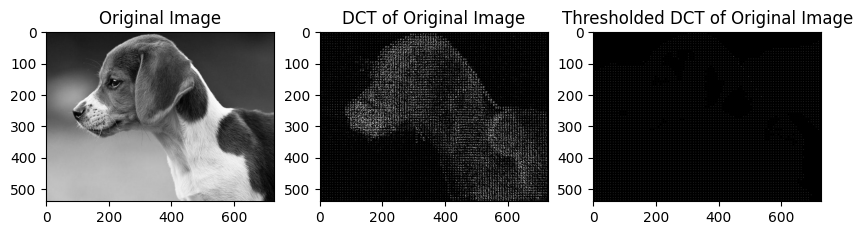




removed DCT coefficients percentage is :  98.74847374847376


In [5]:
# Set the threshold
# Select the dct coefficients which are larger than 20% of the maximum dct coefficient value.
thresh = 0.2

dct_thresholded = test_dct * (abs(test_dct) > (thresh*np.max(test_dct)))

# Plot the original image, the computed DCTs and the selected DCTs using the threshold in the same image.
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(test, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(test_dct, cmap='gray', vmax = np.max(test_dct)*0.01, vmin = 0)
axs[1].set_title('DCT of Original Image')

axs[2].imshow(dct_thresholded, cmap='gray', vmax = np.max(dct_thresholded)*0.01, vmin = 0)
axs[2].set_title('Thresholded DCT of Original Image')

plt.show()

# Calculate the % of rejected dct coefficients above
rejected_percentage = 100 * (np.sum( dct_thresholded == 0.0 ) / (test_shape[0]*test_shape[1]*1.0))
print("\n\n")
print("removed DCT coefficients percentage is : ", rejected_percentage)

**1.4 The next step is to reconstruct the compressed image from the thresholded DCT. Also, compute the RMSE error between the original image and the reconstructed image.**

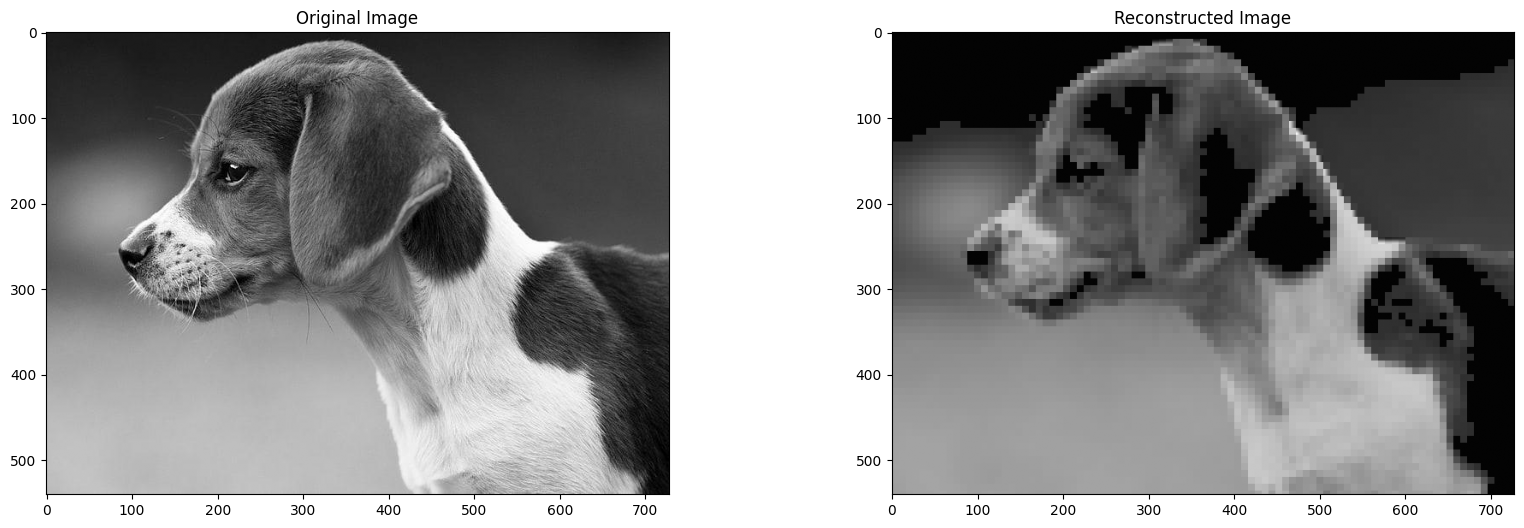




RMSE of the DCT reconsutrcted image w.r.t. the original image:  22.262954088490385


In [6]:
# Reconstruct the image using the two-dimensional inverse DCT wrapper given earlier here. 

reconstructed_test = np.zeros(test_shape)

for i in r_[:test_shape[0]:8]:
    for j in r_[:test_shape[1]:8]:
        reconstructed_test[i:(i+8),j:(j+8)] = idct2( dct_thresholded[i:(i+8),j:(j+8)] )

# Display the original image and the reconstructed image in the same figure
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(test, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(reconstructed_test, cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()

# print RMSE of the reconsutrcted image w.r.t. the original image. 
rmse = np.sqrt(np.mean((test - reconstructed_test)**2))
print("\n\n")
print("RMSE of the DCT reconsutrcted image w.r.t. the original image: ", rmse)

**1.5 Instead of block DCT, now use block FFT to perform image compression. Use the same window as used for DCT. You can use the numpy functions  [`fft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) and for inverse FFT, use the [`ifft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)**

C:\Users\nirzo\AppData\Local\Temp\ipykernel_1204\1806426477.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  test_fft[i:(i+w),j:(j+w)] = fft2( test[i:(i+w),j:(j+w)] )





removed FFT coefficients percentage is :  98.75356125356124





C:\Users\nirzo\AppData\Local\Temp\ipykernel_1204\1806426477.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_test_fft[i:(i+8),j:(j+8)] = ifft2( fft_thresholded[i:(i+8),j:(j+8)] )


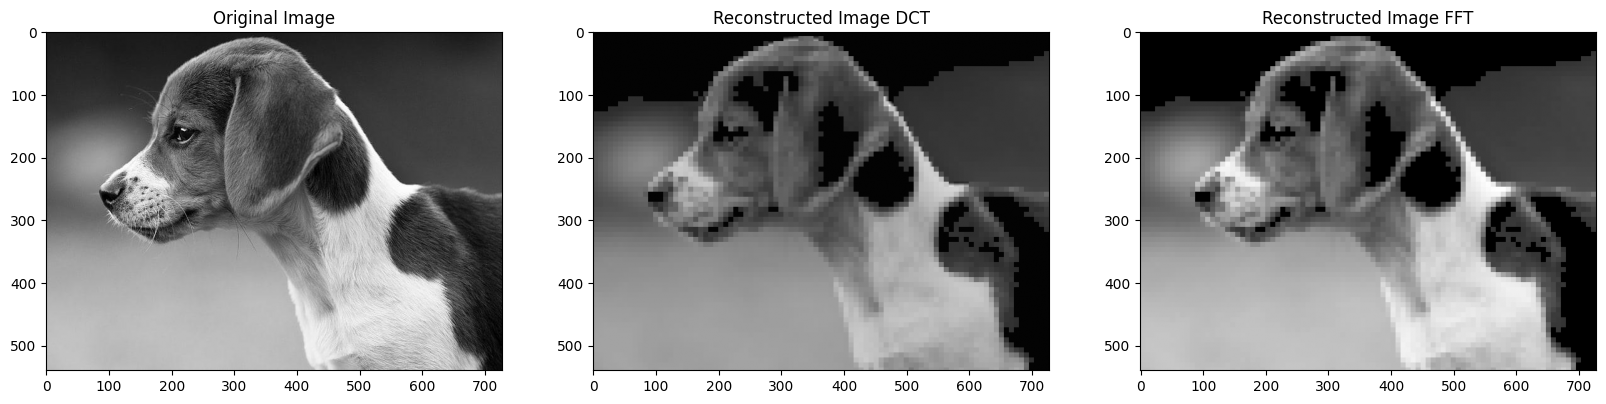




RMSE of the FFT reconsutrcted image w.r.t. the original image:  22.547974731451347


In [7]:
from numpy.fft import fft2, ifft2
# Just as in the case of block DCT, here you need to perform block FFT. Use the same size for the block as done in 1.1 task. 
w = 8

test_shape = test.shape
test_fft = np.zeros(test_shape)
# Now go through each of the 8x8 blocks of the original image and compute its fft.
for i in r_[:test_shape[0]:w]:
  for j in r_[:test_shape[1]:w]:
    test_fft[i:(i+w),j:(j+w)] = fft2( test[i:(i+w),j:(j+w)] )
# Select the fft coefficients which are larger than 20% of the maximum coefficient value.  
thresh = 0.2

fft_thresholded = test_fft * (abs(test_fft) > (thresh*np.max(test_fft)))

# Calculate the % of rejected fft coefficients
rejected_percentage = 100 * (np.sum( fft_thresholded == 0.0 ) / (test_shape[0]*test_shape[1]*1.0))

print("\n\n")
print("removed FFT coefficients percentage is : ", rejected_percentage)
print("\n\n")
# Compute the inverse fft for each of 8x8 blocks of the fft. This is the step of image reconstruction.
reconstructed_test_fft = np.zeros(test_shape)

for i in r_[:test_shape[0]:8]:
    for j in r_[:test_shape[1]:8]:
        reconstructed_test_fft[i:(i+8),j:(j+8)] = ifft2( fft_thresholded[i:(i+8),j:(j+8)] )

# Remember that fft and ifft coefficients are complex. Therefore, for image display purpose, compute the absolute of the ifft coefficients.
# Display the original image, dct compressed image in 1.4 task and the fft compressed image obtained in the above step.

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(test, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(reconstructed_test, cmap='gray')
axes[1].set_title('Reconstructed Image DCT')
axes[2].imshow(np.abs(reconstructed_test_fft), cmap='gray')
axes[2].set_title('Reconstructed Image FFT')
plt.show()
# print RMSE between the original image and the reconstructed image above.
rmse = np.sqrt(np.mean((test - reconstructed_test_fft)**2))
print("\n\n")
print("RMSE of the FFT reconsutrcted image w.r.t. the original image: ", rmse)

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`Approximately 8.5 hours`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Interpreting the DCT visualizations were difficult at first. Then with the help of the Teacher I could solve the problem. `

# References
`[1] https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA5_[student number(s)].ipynb`** (e.g. `DIP_PA5_1234567.ipynb` if solo work or `DIP_PA5_1234567-7654321.ipynb` if pair work)
4. Send **only** the resulting Jupyter notebook (the file with extension `.ipynb`) to matteo.pedone@oulu.fi and use this notebook name as email subject (e.g. DIP_PA5_1234567) . Please **do not include your working folder or the test images** in your submission!